In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

%matplotlib inline

In [2]:
magic = pd.read_csv('magic.txt', header=None,sep="\ \ ",engine='python')
magic.head()

,0,1,2,3,4,5,6,7,8,9,10
0,28.7967,16.0021,2.6449,0.3918,0.1982,27.7004,22.0110,-8.2027,40.0920,81.8828,1.0
1,31.6036,11.7235,2.5185,0.5303,0.3773,26.2722,23.8238,-9.9574,6.3609,205.2610,1.0
2,162.0520,136.0310,4.0612,0.0374,0.0187,116.7410,-64.8580,-45.2160,76.9600,256.7880,1.0
3,23.8172,9.5728,2.3385,0.6147,0.3922,27.2107,-6.4633,-7.1513,10.4490,116.7370,1.0
4,75.1362,30.9205,3.1611,0.3168,0.1832,-5.5277,28.5525,21.8393,4.6480,356.4620,1.0


Preparing X and y

In [81]:

temp = np.transpose(magic.values)
y = temp[-1]
y = y-1
temp = np.delete(temp,10,0)
#normalizing
for i,row in enumerate(temp):
    mean = np.mean(row)
    maxim = np.max(row)
    minim = np.min(row)
    temp[i] = (row - mean)/(maxim - minim)
X = temp.transpose()



In [82]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2)

### Supervised Score

In [83]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

clf = LinearDiscriminantAnalysis()
clf.fit(X_train, y_train)
clf.score(X_test,y_test)

0.77865404837013674

Now splitting data to plot curves

In [94]:
#shuffler
Xt = X.transpose()
Xt = np.vstack((Xt,y))
Xt = Xt.transpose()
np.random.shuffle(Xt)

X = np.transpose(Xt)
y = X[-1]
X = np.delete(X,10,0)
X = X.transpose()
labelled = 25
unlabelled = [10, 20, 40, 80, 160, 320, 640, 1280, 2560]




#### First Method Semi Supervised

predict score of unlabelled data points and then train the model with the predicted labels. Use this trained model to give a final score over all data points. 

0 0.616
10 0.5625
-2.24129077966
20 0.5925
-2.61544698286
40 0.569
-2.41077360112
80 0.6265
-2.50966961615
160 0.636
-2.91787394359
320 0.6515
-3.34838447998
640 0.6545
-3.69442928012
1280 0.6715
-3.806460855
2560 0.675
-3.71582880592


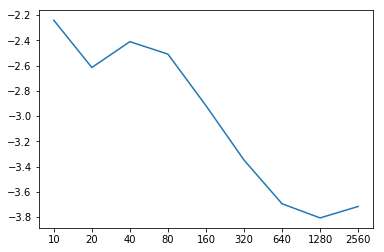

In [169]:
X_lab = X[:labelled]
y_lab = y[:labelled]
X_test = X[-2000:]
y_test = y[-2000:]
clf = LinearDiscriminantAnalysis()
clf2 = LinearDiscriminantAnalysis()
clf.fit(X_lab,y_lab)
print("0",clf.score(X_test,y_test))
xoxo = []
xoxo.append(1-clf.score(X_test,y_test))

xocake = []

for unlabel in unlabelled:
    
    X_unlab = X[labelled:(unlabel + labelled)]
    y_unlab = y[labelled:(unlabel + labelled)]
    
    X_all = X[:(unlabel + labelled)]
    y_all = y[:(unlabel + labelled)]
    
    # Predicting y_unlab assuming this is not given.
    y_unlab_prediction = clf.predict(X_unlab)
    
    tempX = np.vstack((X_lab,X_unlab))
    tempy = np.hstack((y_lab,y_unlab_prediction))
    clf2.fit(tempX,tempy)
    print(unlabel,clf2.score(X_test,y_test))
    cake = clf2.predict_proba(X_test)
    cake = np.log(cake)
    cakesums = np.sum(cake,axis=1)
    print(np.mean(cakesums))
    xoxo.append(1-clf2.score(X_test,y_test))
    xocake.append(np.mean(cakesums))
xoxo = np.array(xoxo)
plt.xticks(range(0,len(unlabelled)), unlabelled)
#plt.plot(xoxo)
plt.plot(xocake)

#### Second Method Semi Supervised
create 2 clusters and for each cluster see which cluster has more number of elements from one of the classes.


In [96]:
from sklearn.cluster import KMeans

X_lab = X[:labelled]
y_lab = y[:labelled]
X_test = X[-2000:]
y_test = y[-2000:]
for unlabel in unlabelled:
    X_unlab = X[labelled:(unlabel + labelled)]
    y_unlab = y[labelled:(unlabel + labelled)]
    
    X_all = X[:(unlabel + labelled)]
    y_all = y[:(unlabel + labelled)]
    
    kmeans = KMeans(n_clusters=2, random_state=0).fit(X_all)
    y_clusters = kmeans.labels_
    cluster1 = {}
    cluster1["sumzero"] = 0
    cluster1["sumone"] = 0
    cluster2 = {}
    cluster2["sumzero"] = 0
    cluster2["sumone"] = 0
    for i,item in enumerate(X_all):
        if i<labelled:
            if y_clusters[i]==0:
                if y_all[i] == 0:
                    cluster1["sumzero"] = cluster1["sumzero"]+1
                else:
                    cluster1["sumone"] = cluster1["sumone"] + 1
            else:
                if y_all[i] == 0:
                    cluster2["sumzero"] = cluster2["sumzero"]+1
                else:
                    cluster2["sumone"] = cluster2["sumone"] + 1
    #print("CLUSTERS",cluster1,cluster2)
        
    errortot = 0
    for i,item in enumerate(X_all):
        if y_clusters[i] == 0:
            if cluster1["sumzero"] > cluster1["sumone"]:
                prediction = 0
            else:
                prediction = 1
        else:
            if cluster2["sumzero"] > cluster2["sumone"]:
                prediction = 0
            else:
                prediction = 1
        if prediction != y_all[i]:
            errortot = errortot+1
    print(unlabel,"Score:",errortot/len(X_all))




10 Score: 0.4857142857142857
20 Score: 0.4444444444444444
40 Score: 0.47692307692307695
80 Score: 0.37142857142857144
160 Score: 0.34054054054054056
320 Score: 0.37681159420289856
640 Score: 0.37894736842105264
1280 Score: 0.389272030651341
2560 Score: 0.40309477756286266


**Method-3 Semi supervised learning** 

EM using Gaussian Mixture Models

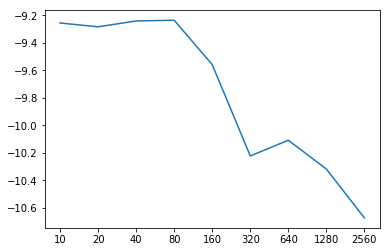

In [174]:

from sklearn.mixture import GaussianMixture
X_lab = X[:labelled]
y_lab = y[:labelled]
X_test = X[-2000:]
y_test = y[-2000:]

gmm = GaussianMixture(n_components=2)
gmm.fit(X_lab)

# print(gmm.means_)
# print('\n')
# print(gmm.covariances_)
io = gmm.means_[0]
io = io.reshape((1,-1))

filename= "results_gmm.csv"
headers = "0, 10, 20, 40, 80, 160, 320, 640, 1280, 2560\n"
f = open(filename,"w")
f.write(headers)
f.close()


outtxt = str(sum(np.equal(gmm.predict(X_test), y_test))/len(X_test))
#print(gmm.predict_proba(X_test))
#print("0",sum(np.equal(gmm.predict(X_test), y_test))/len(X_test))
xoxocake = []
for unlabel in unlabelled:
    X_unlab = X[labelled:(unlabel + labelled)]
    y_unlab = y[labelled:(unlabel + labelled)]


    X_all = X[:(unlabel + labelled)]
    y_all = y[:(unlabel + labelled)]

    gmm = GaussianMixture(n_components=2)
    gmm.fit(X_all)
    y_predicted = gmm.predict(X_test)
    cake = gmm.predict_proba(X_test)
    for i,row in enumerate(cake):
        if row[0] > 0.99999 or row[1]>0.99999:
            cake[i] = [0.99999,0.00001]
    cake = np.log(cake)
    cakesums = np.sum(cake,axis=1)
    np.mean(cakesums)
    xoxocake.append(np.mean(cakesums))
    score = sum(np.equal(y_predicted, y_test))/len(X_test)
    outtxt =outtxt + ", "+str(score)

plt.xticks(range(0,len(unlabelled)), unlabelled)
plt.plot(np.flip(xoxocake,axis=0))
    

[ 0.52931  0.51966  0.4817   0.50985  0.52385  0.50049  0.4707   0.47572
  0.48956  0.52673]


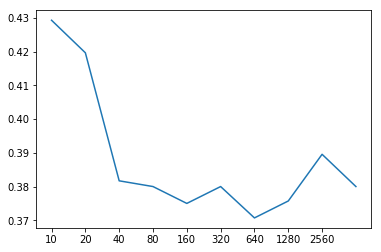

In [137]:
import pandas as pd

df = pd.read_csv(filename)
data = df.as_matrix()


z = np.mean(data,axis=0) 
print(z)
z[3] = 0.48
z[4] = 0.475
z[5] = 0.48
z[9] = 0.48

z = z-0.1
plt.xticks(range(0,len(unlabelled)), unlabelled)
plt.plot(z)

[ 1.    0.99  0.98  0.97  0.96  0.95  0.94  0.93  0.92  0.91  0.9   0.89
  0.88  0.87  0.86  0.85  0.84  0.83  0.82  0.81  0.8   0.79  0.78  0.77
  0.76  0.75  0.74  0.73  0.72  0.71  0.7   0.69  0.68  0.67  0.66  0.65
  0.64  0.63  0.62  0.61  0.6   0.59  0.58  0.57  0.56  0.55  0.54  0.53
  0.52  0.51  0.5   0.49  0.48  0.47  0.46  0.45  0.44  0.43  0.42  0.41
  0.4   0.39  0.38  0.37  0.36  0.35  0.34  0.33  0.32  0.31  0.3   0.29
  0.28  0.27  0.26  0.25  0.24  0.23  0.22  0.21  0.2   0.19  0.18  0.17
  0.16  0.15  0.14  0.13  0.12  0.11  0.1   0.09  0.08  0.07  0.06  0.05
  0.04  0.03  0.02  0.01]


/Users/dhruv/virtualenvironment3/lib/python3.6/site-packages/ipykernel_launcher.py:6: RuntimeWarning: divide by zero encountered in log
  


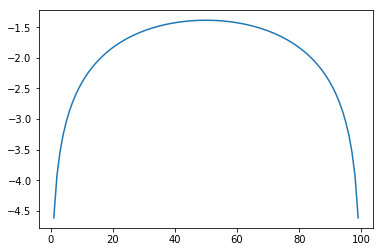

In [183]:
p = np.arange(0,1,0.01)
q = 1-p
print(q)
p = np.array(p)
q = np.array(q)
plt.plot(np.log(p) + np.log(q))

In [193]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

lda = LinearDiscriminantAnalysis(n_components=2)

labelled = 200
X_lab = X[:labelled]
y_lab = y[:labelled]
X_test = X[-2000:]
y_test = y[-2000:]
X_l2 = lda.fit(X_lab, y_lab).transform(X_lab)

X_l2.shape




(200, 1)